In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import os
import numpy as np
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
df = pd.read_csv("./Resources/train.csv")

df = df.drop("Unnamed: 0", axis=1)

df["label"] = df["label"].astype(str)

df["file_name"] = df["file_name"].str.replace("train_data/", "")

df.head()

,file_name,label
0,a6dcb93f596a43249135678dfcfc17ea.jpg,1
1,041be3153810433ab146bc97d5af505c.jpg,0
2,615df26ce9494e5db2f70e57ce7a3a4f.jpg,1
3,8542fe161d9147be8e835e50c0de39cd.jpg,0
4,5d81fa12bc3b4cea8c94a6700a477cf2.jpg,1


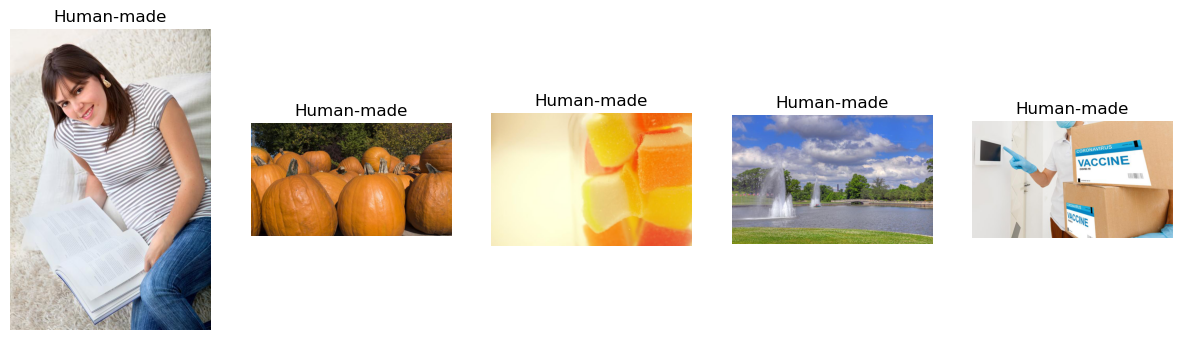

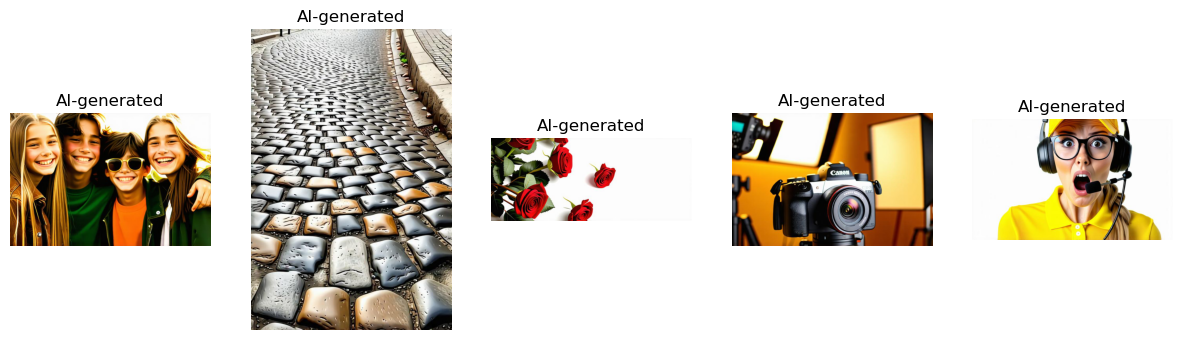

In [5]:
# Show examples
import matplotlib.image as mpimg

def image_examples(image, num_images=5):
    for j in range(2):
        example_image_path = f"./Resources/TrainingImages/{j}/"
        fig = plt.figure(figsize=(15, 5))
        for i in range(5):
            ax = fig.add_subplot(1, 5, i+1)
            img = mpimg.imread(f'{example_image_path}/{os.listdir(example_image_path)[i]}')
            ax.imshow(img)
            ax.axis("off")
            plt.title("Human-made" if j == 0
                      else "AI-generated")
        plt.show()
image_examples(image)

In [7]:
#Split testing and training data
train_image_path = "./Resources/TrainingImages/"
test_image_path = "./Resources/TestingImages/"
image_size = (255, 255)

y = np.array(df["label"])
X_train = tf.keras.preprocessing.image_dataset_from_directory(
    train_image_path,
    labels="inferred",
    image_size=image_size,
    interpolation="bilinear"
)
X_test = tf.keras.preprocessing.image_dataset_from_directory(
    test_image_path,
    labels="inferred",
    image_size=image_size,
    interpolation="bilinear"
)

Found 63960 files belonging to 2 classes.
Found 15990 files belonging to 2 classes.


In [9]:
y_train = np.concatenate([y for x, y in X_train], axis=0)
y_train

array([0, 0, 1, ..., 0, 1, 0])

In [11]:
y_test = np.concatenate([y for x, y in X_test], axis=0)
y_test

array([1, 1, 0, ..., 1, 0, 1])

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

C:\Users\sicke\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Trying with 64 layer set to 32 --> Nevermind
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 253, 253, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 720,194 (2.75 MB)

 Trainable params: 720,194 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
#
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, epochs=10)

Epoch 1/10
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1103s 550ms/step - accuracy: 0.8221 - loss: 0.7447
Epoch 2/10
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1061s 531ms/step - accuracy: 0.9176 - loss: 0.2154
Epoch 3/10
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1053s 527ms/step - accuracy: 0.9293 - loss: 0.1904
Epoch 4/10
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1051s 526ms/step - accuracy: 0.9389 - loss: 0.1660
Epoch 5/10
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1054s 527ms/step - accuracy: 0.9418 - loss: 0.1552
Epoch 6/10
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1052s 526ms/step - accuracy: 0.9454 - loss: 0.1423
Epoch 7/10
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1051s 526ms/step - accuracy: 0.9495 - loss: 0.1400
Epoch 8/10
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1052s 526ms/step - accuracy: 0.9557 - loss: 0.1161
Epoch 9/10
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1052s 526ms/step - accuracy: 0.9576 - loss: 0.1203
Epoch 10/10
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1052s 526ms/step - accuracy: 0.9619 - loss: 0.1026


In [27]:
history.history

{'accuracy': [0.8708880543708801,
  0.9210287928581238,
  0.9319730997085571,
  0.9389461874961853,
  0.9422920346260071,
  0.9469512104988098,
  0.9511882662773132,
  0.9564259052276611,
  0.9592245221138,
  0.9623358249664307],
 'loss': [0.3613567352294922,
  0.20727869868278503,
  0.18215306103229523,
  0.16511614620685577,
  0.1546243280172348,
  0.13867118954658508,
  0.13156533241271973,
  0.11625495553016663,
  0.11056860536336899,
  0.10133839398622513]}

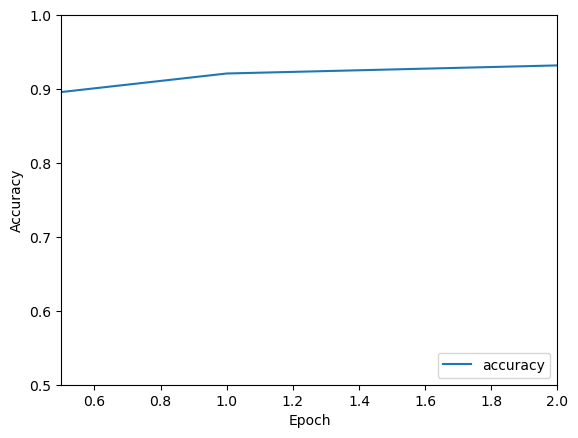

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.xlim([0.5, 2])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(train_generator)

In [31]:
model.save("./model_03.h5")

Enter the url of the image to identify:  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSyfHKApTlLaZrFiWANryKN3fCO5A9eb2osgQ&s


255.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
real


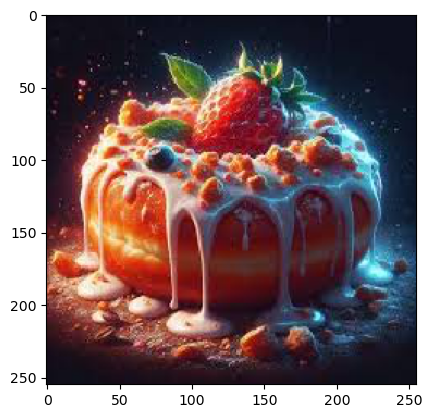

In [293]:
import urllib.request
# from urllib.request import urlopen
import io
#from io import BytesIO

image_size = (255, 255)
label = ["real", "ai"]
#image_path = ""

def predictImage(url):
    with urllib.request.urlopen(url) as rawdata:
        img = tf.keras.preprocessing.image.load_img(io.BytesIO(rawdata.read()), target_size=image_size)
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = x[np.newaxis,:,:,:]
    print(np.max(x))
    plt.imshow(img)
    predictions = model.predict(x)
    prediction = np.argmax(predictions)
    print(label[prediction])

url = input("Enter the url of the image to identify: ")
predictImage(url)


255.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
human


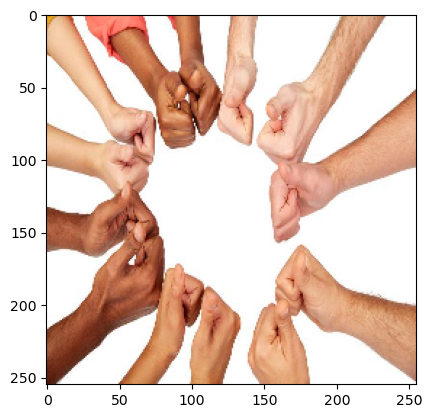

In [49]:
import urllib.request
# from urllib.request import urlopen
import io
#from io import BytesIO

image_size = (255, 255)
label = ["human", "ai"]
image_path = "./Resources/TrainingImages/0/"
image_name = "00a7657272904d2f81da11bb9f91c330.jpg"
image_to_predict = image_path+image_name

def predictImage(image_to_predict):
    test_df = pd.DataFrame({"file_name": [image_name]})
    img = tf.keras.preprocessing.image.load_img(image_to_predict, target_size=image_size)
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = x[np.newaxis,:,:,:]
    print(np.max(x))
    plt.imshow(img)
    predictions = model.predict(x)
    prediction = np.argmax(predictions)
    print(label[prediction])

predictImage(image_to_predict)
